### MODEL

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(20))
model.add(Activation('softmax'))

##### SGD

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

##### Adam

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# 50 EPOCHS

In [22]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=True)

Train on 2084 samples, validate on 447 samples
Epoch 1/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.9629 - accuracy: 0.0893 - val_loss: 2.9698 - val_accuracy: 0.0626
Epoch 2/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.9250 - accuracy: 0.0907 - val_loss: 2.9414 - val_accuracy: 0.0626
Epoch 3/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.8941 - accuracy: 0.0969 - val_loss: 2.9311 - val_accuracy: 0.1096
Epoch 4/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.8271 - accuracy: 0.1108 - val_loss: 3.2579 - val_accuracy: 0.0738
Epoch 5/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.7202 - accuracy: 0.1531 - val_loss: 2.9301 - val_accuracy: 0.1141
Epoch 6/50
2084/2084 [==============================] - 30s 14ms/step - loss: 2.5586 - accuracy: 0.1924 - val_loss: 3.0195 - val_accuracy: 0.1365
Epoch 7/50
2084/2084 [==============================] - 31s 15ms/step - loss:

In [23]:
_, accuracy = model.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' % (accuracy*100))

2084/2084 [==============================] - 9s 4ms/step
Train Accuracy: 100.00


In [24]:
_, accuracy = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f' % (accuracy*100))

447/447 [==============================] - 2s 4ms/step
Validation Accuracy: 81.66


##### summarize history for accuracy and loss

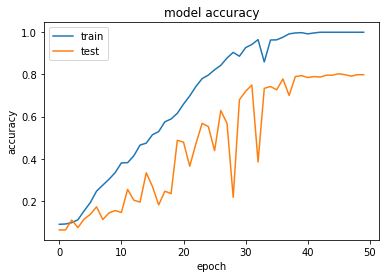

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

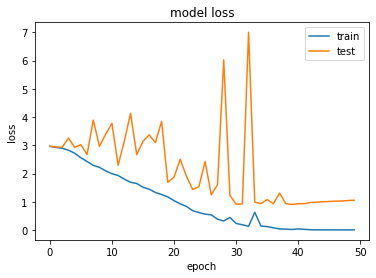

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

##### early stopping

In [30]:
from keras.callbacks import EarlyStopping

In [31]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=0,
                   verbose=0,
                   mode='auto')

In [35]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(X_val, y_val), 
                    shuffle=True, 
                    callbacks=[es])

Train on 2084 samples, validate on 447 samples
Epoch 1/100
2084/2084 [==============================] - 32s 15ms/step - loss: 2.9632 - accuracy: 0.0893 - val_loss: 2.9221 - val_accuracy: 0.1186
Epoch 2/100
2084/2084 [==============================] - 31s 15ms/step - loss: 2.9216 - accuracy: 0.0931 - val_loss: 2.9101 - val_accuracy: 0.0828
Epoch 3/100
2084/2084 [==============================] - 31s 15ms/step - loss: 2.9025 - accuracy: 0.1008 - val_loss: 2.8731 - val_accuracy: 0.0940
Epoch 4/100
2084/2084 [==============================] - 31s 15ms/step - loss: 2.8498 - accuracy: 0.1156 - val_loss: 3.0222 - val_accuracy: 0.0447


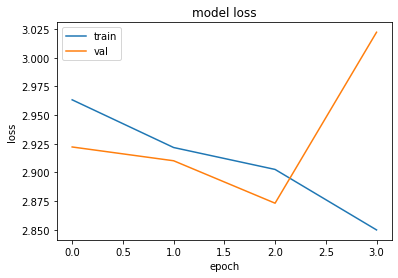

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

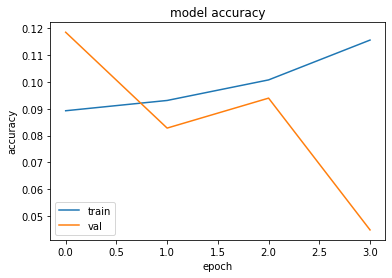

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

##### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [28]:
predictions = model.predict_classes(X_test)

In [29]:
yhat = predictions.astype(int)

In [30]:
ytest = y_test.values.astype(int)

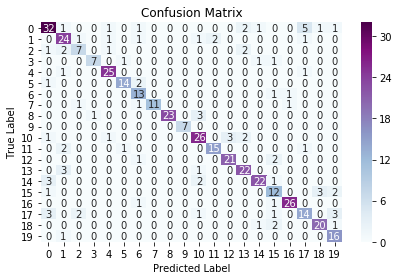

In [31]:
matrix = confusion_matrix(ytest, yhat)
sn.heatmap(matrix, annot=True, cmap="BuPu", annot_kws={"size": 10})

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.ylim([20,0]) 
plt.tight_layout()
plt.show()